# Hermit Fold 1 - Inspect Training Data Exclusion in Exp 4

In [1]:
import os
from collections import Counter

In [2]:
import pandas as pd

In [3]:
from leaderboard.utils import rasa_utils, eda_utils

## Load Data

In [4]:
data_path = "../../../../training-data/public/HERMIT/KFold_1"

In [5]:
from omegaconf import MISSING

In [6]:
from leaderboard.utils import experiment, rasa_utils
import leaderboard.nlu.exp_4_stratify_infrequent_entities_only_for_exclusion as exp_4

In [7]:
base_config = exp_4.Config(
    train_exclusion_fraction=MISSING,
    data=experiment.DataConfig(
        name="name",
        data_path=os.path.join(data_path, 'train', 'train.yml'),
    ),
    model=experiment.ModelConfig(),
    clear_rasa_cache=True,
    test_data_path= os.path.join(data_path, 'test', 'test.yml'),
)

In [8]:
base_config

Config(script='/Users/kabu/Documents/workspace/rasa2/leaderboard/nlu/exp_4_stratify_infrequent_entities_only_for_exclusion.py', model=ModelConfig(name='???', config_path='???'), data=DataConfig(name='name', data_path='../../../../training-data/public/HERMIT/KFold_1/train/train.yml'), clear_rasa_cache=True, train_exclusion_fraction='???', exclusion_seed=345, test_data_path='../../../../training-data/public/HERMIT/KFold_1/test/test.yml')

## Test Exclusion Method

In [9]:
base_config.train_exclusion_fraction = 0.75
base_config.exclusion_ignore_leq = 10

In [10]:
exp = exp_4.EntityExperiment(base_config, out_dir='./')

In [11]:
train_data = rasa_utils.load_nlu_data(exp.config.data.data_path)

/Users/kabu/Documents/workspace/rasa2/rasa/shared/utils/io.py:98: UserWarning: Training data file /Users/kabu/Documents/workspace/training-data/public/HERMIT/KFold_1/train/train.yml has a lower format version than your Rasa Open Source installation: 2.0 < 3.1. Rasa Open Source will read the file as a version 3.1 file. Please update your version key to 3.1. See https://rasa.com/docs/rasa/training-data-format.


In [12]:
labels = exp._pseudo_labels(train_data)

In [13]:
pd.Series(labels).value_counts().tail(10)

coffee_type             31
general_frequency       27
playlist_name           21
movie_name              18
email_folder            17
music_descriptor        17
ingredient              15
alarm_type              14
movie_type              13
transport_descriptor    11
dtype: int64

In [14]:
train, test = exp.load_train_test_split()

/Users/kabu/Documents/workspace/rasa2/rasa/shared/utils/io.py:98: UserWarning: Training data file /Users/kabu/Documents/workspace/training-data/public/HERMIT/KFold_1/train/train.yml has a lower format version than your Rasa Open Source installation: 2.0 < 3.1. Rasa Open Source will read the file as a version 3.1 file. Please update your version key to 3.1. See https://rasa.com/docs/rasa/training-data-format.
/Users/kabu/Documents/workspace/rasa2/rasa/shared/utils/io.py:98: UserWarning: Training data file /Users/kabu/Documents/workspace/training-data/public/HERMIT/KFold_1/test/test.yml has a lower format version than your Rasa Open Source installation: 2.0 < 3.1. Rasa Open Source will read the file as a version 3.1 file. Please update your version key to 3.1. See https://rasa.com/docs/rasa/training-data-format.


In [15]:
splits = {'train' : train, 'test': test}
splits = {key : eda_utils.nlu_data_to_df(data) for key, data in [('train',train), ('test', test)]}

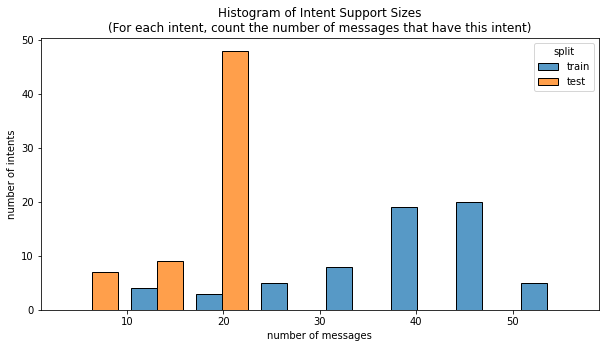

In [16]:
_ = eda_utils.intent_support(splits)

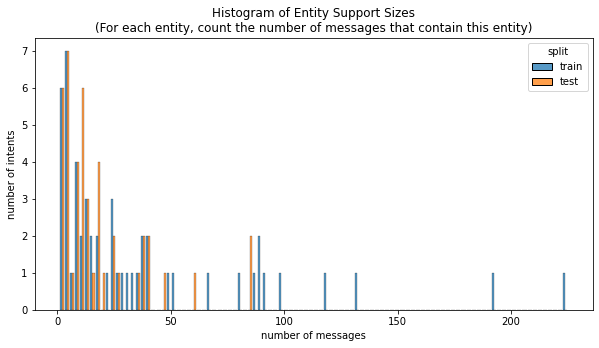

In [17]:
entity_support = eda_utils.entity_support(splits, bins=100)

In [18]:
entity_support['train'].tail(10)

,entity,message_count
32,ingredient,4
27,music_descriptor,4
49,audiobook_author,4
50,alarm_type,4
31,cooking_type,3
44,transport_name,3
45,movie_type,3
46,transport_descriptor,3
51,drink_type,1
52,game_type,1
